In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
od.download("https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india")

Skipping, found downloaded files in "./house-price-dataset-of-india" (use force=True to force download)


In [ ]:
df= pd.read_csv("/content/house-price-dataset-of-india/House Price India.csv")

In [ ]:
# List of columns to drop
columns_to_drop = ['id', 'Date', 'lot area', 'number of floors', 'waterfront present', 'number of views',
                   'condition of the house', 'Area of the basement', 'Built Year', 'Renovation Year',
                   'Postal Code', 'Lattitude', 'Longitude', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport']

In [ ]:
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,number of bedrooms,number of bathrooms,living area,grade of the house,Area of the house(excluding basement),living_area_renov,Price
0,5,2.50,3650,10,3370,2880,2380000
1,4,2.50,2920,8,1910,2470,1400000
2,5,2.75,2910,8,2910,2940,1200000
3,4,2.50,3310,9,3310,3350,838000
4,3,2.00,2710,8,1880,2060,805000


In [ ]:
print(df.shape)

(14620, 7)


In [ ]:
# Drop any duplicate rows
df = df.drop_duplicates()


In [ ]:
print(df.shape)

(14602, 7)


# **Analysis**

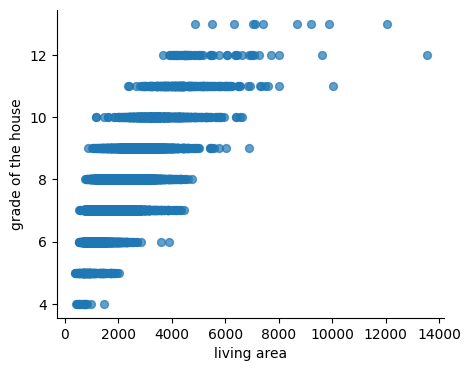

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='living area', y='grade of the house', s=32, alpha=.7, figsize=(5, 4))
plt.gca().spines[['top', 'right',]].set_visible(False)

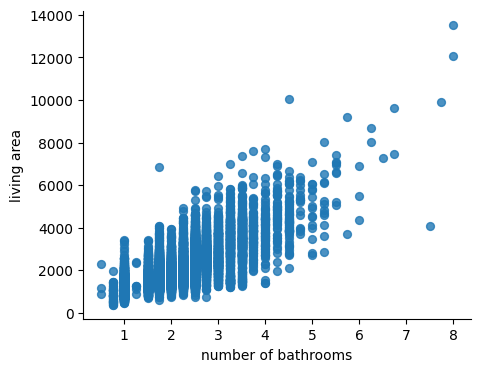

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='number of bathrooms', y='living area', s=32, alpha=.8, figsize=(5, 4))
plt.gca().spines[['top', 'right',]].set_visible(False)

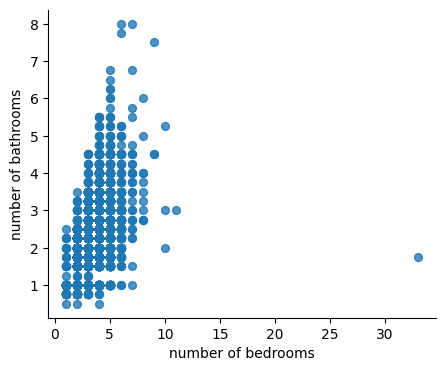

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='number of bedrooms', y='number of bathrooms', s=32, alpha=.8, figsize=(5, 4))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the graphs, we can say that there is no significant amount of outliers that can effect the performance

**Correlation Matrix**

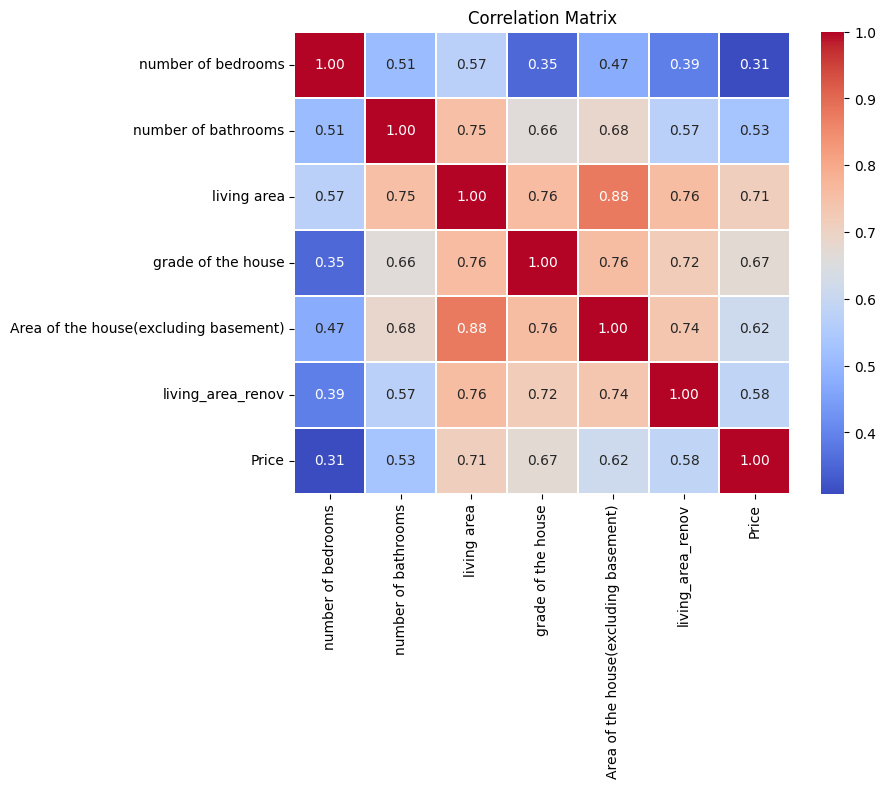

In [ ]:
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.2)
plt.title("Correlation Matrix")
plt.show()

# **Data Preparation**

I tried various methods to handle outliers to see how it effects the result. but, there is no need to use them as the dataset how it is gives the best result.

In [ ]:
# # Handling outliers
# # Here, we'll remove rows with values more than 3 standard deviations away from the mean

# z_scores = np.abs((df - df.mean()) / df.std())
# df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# # Handling outliers using IQR method
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# # Handling outliers using Isolation Forest
# outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
# outliers = outlier_detector.fit_predict(df.drop('Price', axis=1))

# # Keep only non-outliers
# df = df[outliers == 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Implementation**

**Linear Regression**

In [ ]:
# Create a pipeline for preprocessing and linear regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler()))
])


In [ ]:
# Train the model
pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [ ]:
# Make predictions on the test set
y_pred = pipeline_lr.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 55149633768.45354


In [ ]:
user_input = {
    'number of bedrooms': 3,
    'number of bathrooms': 2.00,
    'living area': 2710,
    'grade of the house': 8.0,
    'Area of the house(excluding basement)': 1880.0,
    'living_area_renov': 2060.0
}

# 3	2.00	2710	8	1880	2060  805000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = pipeline_lr.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 762178.5840174851


**Decision Tree Regressor**

In [ ]:
# Create a pipeline for preprocessing and decision tree regression
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', DecisionTreeRegressor())
])


In [ ]:
# Train the model
pipeline_dt.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor())])

In [ ]:
# Make predictions on the test set
y_pred_dt = pipeline_dt.predict(X_test)


In [ ]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')

Decision Tree Mean Squared Error: 94017120610.8551


In [ ]:
user_input = {
    'number of bedrooms': 4,
    'number of bathrooms': 2.5,
    'living area': 3310,
    'grade of the house': 9.0,
    'Area of the house(excluding basement)': 3310.0,
    'living_area_renov': 3350.0
}

# 4	2.50	3310	9	3310	3350	838000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = pipeline_dt.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 838000.0


**Random Forest Regressor(with grid search)**

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a pipeline for preprocessing and random forest regression
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RandomForestRegressor())
])

In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}


In [ ]:
# Get the best model
best_rf_model = grid_search_rf.best_estimator_


In [ ]:
# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)


In [ ]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 47922835646.55556


In [ ]:
user_input = {
    'number of bedrooms': 3,
    'number of bathrooms': 2.00,
    'living area': 2710,
    'grade of the house': 8.0,
    'Area of the house(excluding basement)': 1880.0,
    'living_area_renov': 2060.0
}

# 3	2.00	2710	8	1880	2060  805000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = best_rf_model.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 674788.8358617335


**Random Forest Regressor(without grid search)**

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RandomForestRegressor())
])

In [ ]:
# Train the model
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [ ]:
# Make predictions on the test set
y_pred_rf = pipeline_rf.predict(X_test)


In [ ]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 51667636534.21215


In [ ]:
user_input = {
    'number of bedrooms': 3,
    'number of bathrooms': 2.00,
    'living area': 2710,
    'grade of the house': 8.0,
    'Area of the house(excluding basement)': 1880.0,
    'living_area_renov': 2060.0
}

# 3	2.00	2710	8	1880	2060  805000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = pipeline_rf.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 788402.5


**Support Vector Machine (SVM) Regressor**

In [ ]:
# Create a pipeline for preprocessing and SVM regression
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', SVR())
])

In [ ]:
# Train the model
pipeline_svm.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SVR())])

In [ ]:
# Make predictions on the test set
y_pred_svm = pipeline_svm.predict(X_test)


In [ ]:
# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error: {mse_svm}')

In [ ]:
user_input = {
    'number of bedrooms': 3,
    'number of bathrooms': 2.00,
    'living area': 2710,
    'grade of the house': 8.0,
    'Area of the house(excluding basement)': 1880.0,
    'living_area_renov': 2060.0
}

# 3	2.00	2710	8	1880	2060  805000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = pipeline_svm.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

**Gradient Boosting Regressor**

In [ ]:
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', GradientBoostingRegressor())
])

In [ ]:
# Train the model
pipeline_gb.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [ ]:
# Make predictions on the test set
y_pred_gb = pipeline_gb.predict(X_test)

In [ ]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')

Gradient Boosting Mean Squared Error: 49040018263.312294


In [ ]:
user_input = {
    'number of bedrooms': 3,
    'number of bathrooms': 2.00,
    'living area': 2710,
    'grade of the house': 8.0,
    'Area of the house(excluding basement)': 1880.0,
    'living_area_renov': 2060.0
}

# 3	2.00	2710	8	1880	2060  805000

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Use the model to predict the price
predicted_price = pipeline_gb.predict(user_df)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 613585.1706112474


# **Model Explanation**

In [ ]:
pip install shap


In [ ]:
import shap


In [ ]:
# Assuming pipeline_dt is already trained
explainer = shap.Explainer(pipeline_dt.named_steps['regressor'], X_train)

In [ ]:
# Assuming X_test is your test set
shap_values = explainer.shap_values(X_test)


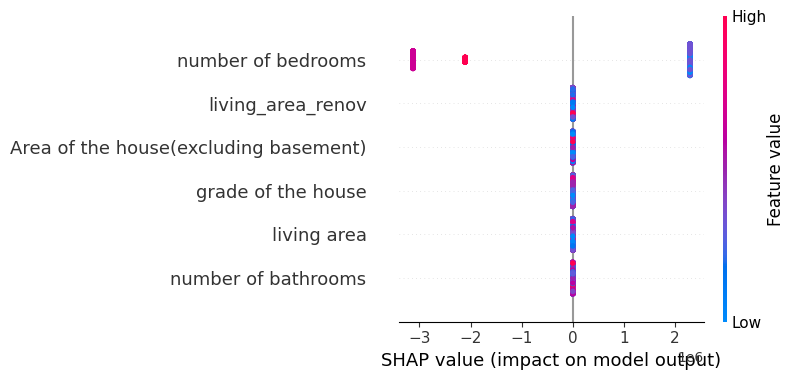

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
# Assuming i is the index of the prediction you want to explain
shap.force_plot(explainer.expected_value, shap_values[7, :], X_test.iloc[7, :])
